In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how='left', on='city')
pyber_df

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

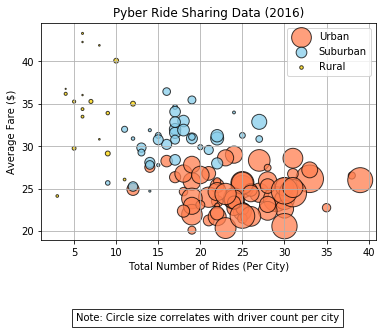

In [2]:
# Obtain the x and y coordinates for each of the three city types
cities = pyber_df.groupby('city')['ride_id'].count()
x_limit = cities.max()
average_fare = pyber_df.groupby('city')['fare'].mean()
y_limit = average_fare.max()
drivers_c = pyber_df.groupby('city')['driver_count'].sum()
drivers_c

# Build the scatter plots for each city types
c_rides = pyber_df.groupby('city')['ride_id'].count()
a_fare = pyber_df.groupby('city')['fare'].mean()
d_city = pyber_df.groupby('city')['driver_count'].sum()

urban = pyber_df.loc[pyber_df['type'] == "Urban"]
u_rides = urban.groupby('city')['ride_id'].count()
u_fare = urban.groupby('city')['fare'].mean()
u_drivers = urban.groupby('city')['driver_count'].sum()

suburban = pyber_df.loc[pyber_df['type'] == "Suburban"]
s_rides = suburban.groupby('city')['ride_id'].count()
s_fare = suburban.groupby('city')['fare'].mean()
s_drivers = suburban.groupby('city')['driver_count'].sum()

rural = pyber_df.loc[pyber_df['type'] == "Rural"]
r_rides = rural.groupby('city')['ride_id'].count()
r_fare = rural.groupby('city')['fare'].mean()
r_drivers = rural.groupby('city')['driver_count'].sum()

plt.scatter(u_rides, u_fare, marker = 'o', color = ('coral'), edgecolors = 'black',
           s= ((u_drivers)/3), alpha = .75, label= 'Urban')
plt.scatter(s_rides, s_fare, marker = 'o', color = ('skyblue'), edgecolors = 'black',
           s= ((s_drivers)/3), alpha = .75, label= 'Suburban')
plt.scatter(r_rides, r_fare, marker = 'o', color = ('gold'), edgecolors = 'black',
           s= ((r_drivers)/3), alpha = .75, label= 'Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
plt.legend()

# Incorporate a text label regarding circle size
text = 'Note: Circle size correlates with driver count per city'
plt.annotate(text, xy=(1, 1), xytext=(-300, -300), fontsize=10,
xycoords='axes fraction', textcoords='offset points',
bbox=dict(facecolor='white', alpha=0.8),
horizontalalignment='left', verticalalignment='bottom')

# Save Figure
plt.savefig('Pyber_Ride_Sharing_Data(2016).png')
plt.show()

## Total Fares by City Type

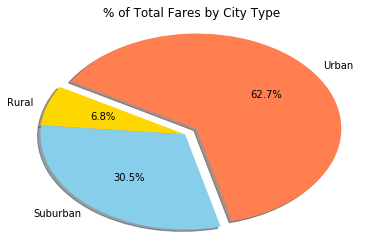

In [3]:
# Calculate Type Percents
fare_percent = pyber_df.groupby('type')['fare'].sum()
fare_total = fare_percent.sum()

# Build Pie Chart
labels = 'Rural', 'Suburban','Urban'
sizes = fare_percent
colors = ['gold','skyblue','coral']
explode= [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=150)

plt.title('% of Total Fares by City Type')
plt.axis('auto')
# Save Figure
plt.savefig('%_of_Total_Fares_by_City_Type.png')
plt.show()

## Total Rides by City Type

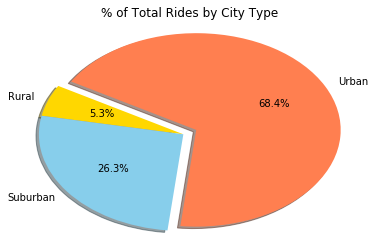

In [4]:
# Calculate Ride Percents
ride_percent = pyber_df.groupby('type')['ride_id'].count()

# Build Pie Chart
labels='Rural', 'Suburban','Urban'
sizes = ride_percent
colors = ['gold','skyblue','coral']
explode= [0,0,0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Rides by City Type') 
plt.axis('auto')

# Save Figure
plt.savefig('%_of_Total_Rides_by_City_Type.png')
plt.show()

## Total Drivers by City Type

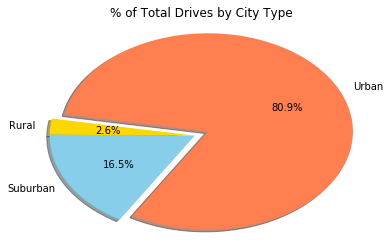

In [5]:
# Calculate Driver Percents
drivers = pyber_df.drop_duplicates(subset='city', keep='first')
drivers_percent = drivers.groupby('type')['driver_count'].sum()

# Build Pie Charts
labels='Rural', 'Suburban','Urban'
sizes = drivers_percent
colors = ['gold','skyblue','coral']
explode= [0,0,0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=170)
plt.title('% of Total Drives by City Type')
plt.axis('auto')

# Save Figure
plt.savefig('%_of_Total_Drives_by_City_Type.png')
plt.show()

In [6]:
#Analysis
#Trend 1- For total fares, rides, and drivers by city type, urban held majority.
#Trend 2- The rural city type had the lowest percentage of total drivers, rides, and fares.
#Trend 3- Cities with the highest average fares had smaller driver counts.